# Welcome to this notebook
## We are going to classify some mushrooms into two categories: posionous and edible

#### Let's start by importing our libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Now let's create a dataframe of our data

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### As you can see our data is alphabetical. We are going to use label encoding to convert it into numerical data

In [3]:
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### Now let's split our dataframe into data and labels

In [4]:
X = df.loc[: , df.columns != 'class']
y = df['class']

#### And let's scale it so we have better accuracy

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### We are going to use PCA in order to reduce the dimentionality of our data and make training faster

In [6]:
pca = PCA()
X = pca.fit_transform(X)

#### Now let's use k-means to visualize what our data should look like using k-means

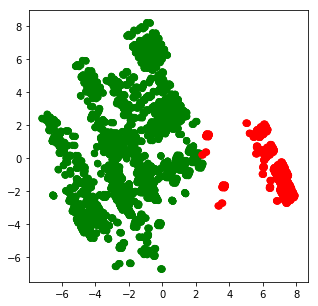

In [7]:
N=df.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)

kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

#### Split the data into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### And finally let's use a support vectore classifier to fit our data and score it to find out how accurate it is

In [9]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9901538461538462

#### 99% Accuracy is great!
#### Not so great when you realize that one in 100 people who use our model may eat a poisonous mushroom.
#### We need to do better!

### We can improve by using grid search to find the best hyperparameters for our model

In [10]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [13]:
model_svm = RandomizedSearchCV(svc, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


### 100%!!! Now that's what I'm talking about. Now I can be confident that nobody is going to be posoned by my mushroom recognizer!